<a href="https://colab.research.google.com/github/HosseinEyvazi/MLOps/blob/main/1-Model_Deployment-California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

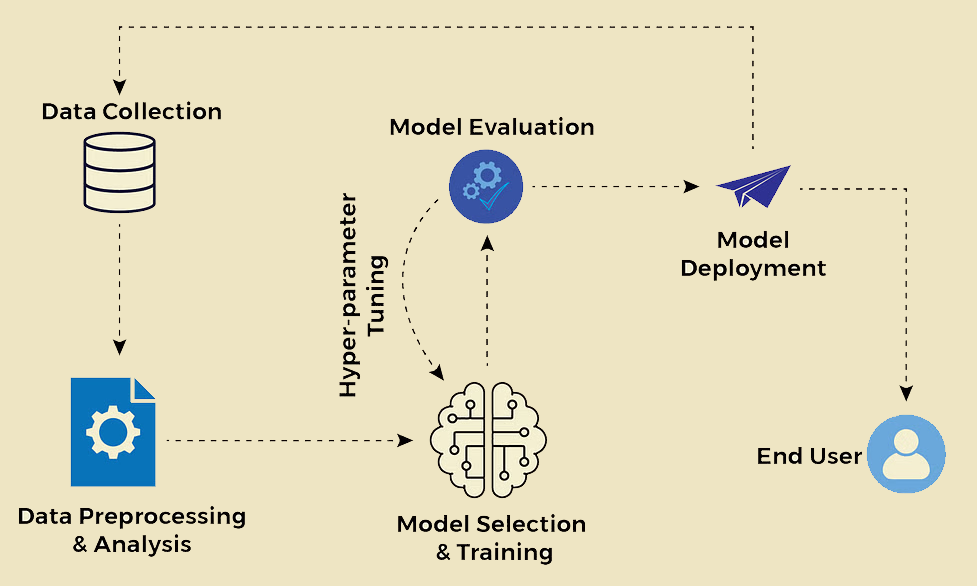


# Module 1: Model Deployment Overview

## 1. The ML Lifecycle vs. Deployment Implementation

### The Macro View: The Complete ML Lifecycle
The full machine learning project follows these sequential phases:

1.  **_Data_Collection_**: Gathering raw data from various sources.
2.  **_Model_Selection_**: Choosing an appropriate algorithm (Random Forest, Neural Networks, etc.).
3.  **_Model_Evaluation_**: Assessing performance using metrics (Accuracy, F1-Score, AUC).
4.  **_Model_Deployment_**: Moving the trained model into production.

The first three phases occur in an **_Experimentation_** environment (a Jupyter Notebook or a local machine). The fourth phase transitions the model into a **_Production_** environment.

### The Micro View: Inside "Model Deployment"
When we zoom into **_Model_Deployment_** specifically, we discover that it is not a single action but a **_Deployment_Stack_** composed of multiple layers:

1.  **_The_Interface_Layer_** (How does the outside world communicate with the model?)
    *   **Tool**: **_FastAPI_**, Flask, or similar web frameworks.
    *   **Purpose**: Receive input data in JSON format and return predictions.
2.  **_The_Packaging_Layer_** (Where does the code live, and how is it portable?)
    *   **Tool**: **_Docker_** containers.
    *   **Purpose**: Bundle the operating system, Python libraries, and the API code into a single reproducible unit.
3.  **_The_Orchestration_Layer_** (How are multiple containers managed at scale?)
    *   **Tool**: **_Kubernetes_** or cloud-native services.
    *   **Purpose**: Automatically restart failed containers, scale up during traffic spikes, and manage resource allocation.

## 2. What is Model Deployment? (Formal Definition)

**_Model_Deployment_** is the integration of a trained machine learning model into a production system such that it can:

1.  Accept input data (raw features).
2.  Apply the same **_Preprocessing_** logic used during training.
3.  Generate predictions using the model weights.
4.  Return results to the requesting application or user.
5.  Log and monitor performance metrics in real-time.

A deployed model must also be **_Reproducible_**, meaning it behaves identically across different machines and time periods.

## 3. Serving Methods: How Predictions Are Delivered

When we deploy a model, we choose one of three primary serving architectures:

### 3.1 Real-Time API
**_Real-Time_API_** serves predictions immediately upon request, typically via HTTP.
*   **Response Time**: Milliseconds to seconds.
*   **Use Case**: Credit card fraud detection, product recommendation at checkout, chatbot responses.
*   **Tool**: **_FastAPI_**, Flask, or Django.
*   **Constraint**: The model must be fast enough to respond before the user loses patience (typically <200ms for user-facing systems).

### 3.2 Batch Inference
**_Batch_Inference_** processes large volumes of data offline at scheduled intervals.
*   **Response Time**: Minutes to hours.
*   **Use Case**: Daily reports, overnight model scoring, quarterly analytics.
*   **Tool**: Scheduled jobs (cron, Apache Airflow, Kubernetes CronJobs).
*   **Advantage**: Can process millions of records efficiently without real-time latency pressure.

### 3.3 Edge Deployment
**_Edge_Deployment_** runs the model directly on user devices rather than a central server.
*   **Response Time**: Instantaneous (no network latency).
*   **Use Case**: Mobile apps, IoT devices, self-driving cars, offline applications.
*   **Tool**: Model compression (ONNX, TensorFlow Lite), on-device runtimes.
*   **Advantage**: Privacy (data never leaves the device) and reliability (no internet dependency).

> **Note**: This module focuses on Real-Time API deployment via **_FastAPI_** and **_Docker_**.

## 4. Why Deployment Matters: Closing the Value Gap

A model trained in a Jupyter Notebook provides **zero business value** if it cannot be accessed by end-users or integrated into production systems. Deployment bridges the critical gap between **_Experimentation_** (building the model) and **_Operationalization_** (running it in the real world).

### The Experimentation vs. Deployment Contrast

| Dimension | Experimentation | Deployment |
| :--- | :--- | :--- |
| **Goal** | Maximize model accuracy and interpretability. | Maximize uptime, throughput, and reliability. |
| **Code Quality** | Iterative, exploratory, potentially messy. | Clean, tested, version-controlled, documented. |
| **Performance Metrics** | Accuracy, Precision, Recall, F1-Score. | Latency, Throughput, Availability, Error Rate. |
| **Failure Tolerance** | Acceptable; you iterate and retry. | Unacceptable; production outages cost money. |
| **Environment** | Local machine, cloud notebook (Colab). | Dedicated servers, cloud infrastructure. |

## 5. Critical Deployment Challenges

Moving a model from a notebook to a production server introduces five major challenges:

### 5.1 Scalability
**_Scalability_** is the ability to handle increasing loads without degradation in performance.
*   **Challenge**: Your model may process 5 requests per minute during development testing, but must handle 10,000 requests per minute during peak traffic.
*   **Implementation**: A single API server cannot handle this volume. You must deploy multiple instances behind a **_Load_Balancer_**.
*   **Tool**: **_Kubernetes_** automatically scales containers up or down based on CPU and memory usage.

### 5.2 Latency
**_Latency_** is the time elapsed between a request arriving at the server and a response being sent back.
*   **Challenge**: A fraud detection system has <200 milliseconds to decide whether to block a transaction.
*   **Implementation**: The model must be loaded into memory once (not from disk on every request). Preprocessing steps must be optimized.

### 5.3 Reproducibility
**_Reproducibility_** means the model behaves identically across different machines and across time.
*   **Challenge**: The "It works on my machine" failure. This occurs when library versions differ between development and production.
*   **Implementation**: Freeze all dependencies in a `requirements.txt` file. Use **_Docker_** to ensure the same operating system and library versions everywhere.
*   **Critical Rule**: If you preprocessed training data using a specific scaler, the production API must use the **exact same scaler**. Failure to do this introduces **_Training_Serving_Skew_**.

### 5.4 Data Drift & Distribution Shift
**_Data_Drift_** occurs when the distribution of input data changes over time.
*   **Challenge**: Standard machine learning assumes training and testing data are **_Independent_and_Identically_Distributed_** (i.i.d.). In production, this assumption often breaks via **_Covariate_Shift_** (input distribution changes) or **_Concept_Drift_** (relationship changes).
*   **Implementation**: Monitor incoming data distribution. Trigger **_Retraining_** when drift exceeds a threshold.

### 5.5 Robustness to Out-Of-Distribution Data
**_Out-Of-Distribution_** (O.O.D.) data refers to inputs that significantly differ from the training set.
*   **Challenge**: Models often confidently predict nonsense on O.O.D. inputs.
*   **Modern Approach**: Robust models are designed to gracefully degrade or reject the input.

## 6. Deployment Architectures: Where Does Your Model Run?

### 6.1 On-Premises Deployment
**_On-Premises_** means your model runs on servers located in your company's physical facility.
*   **Use Cases**: Highly sensitive data (banking, military) or extreme latency requirements.
*   **Pros/Cons**: Full control, but high capital cost and manual maintenance.

### 6.2 Cloud Deployment
**_Cloud_** deployment means your model runs on rented servers (AWS, Google Cloud, Azure).
*   **Use Cases**: Startups needing **_Elasticity_** and variable traffic handling.
*   **Pros/Cons**: Pay-as-you-go and automatic scaling, but data leaves your facility.

### 6.3 Edge Deployment
**_Edge_** deployment means the model runs on the device itself.
*   **Use Cases**: Self-driving cars, offline mobile apps.
*   **Pros/Cons**: Zero latency and high privacy, but limited by device hardware.

### 6.4 Hybrid Deployment
**_Hybrid_** deployment combines these methods (e.g., sensitive data stays **_On-Premises_**, while heavy computation happens in the **_Cloud_**).

## 7. Production Pipeline Components

A complete deployment pipeline consists of five sequential stages:

1.  **_Preprocessing_**: Transforms raw input data. **Critical Rule**: Must match training logic exactly.
2.  **_Serving_**: The API that accepts requests and loads the model.
3.  **_Logging_**: Records every request, response, and error for debugging.
4.  **_Monitoring_**: Watches logs for **_Latency_**, **_Error_Rate_**, and **_Drift_**.
5.  **_Retraining_**: Updates the model with new data when monitoring triggers an alert.

## 8. The Deployment Technology Stack

*   **_FastAPI_**: A high-performance web framework for building APIs. It provides the interface for the model.
*   **_Docker_**: A containerization platform. It solves reproducibility by packaging the code, OS, and libraries together.
*   **_Kubernetes_**: An orchestration platform. It manages fleets of Docker containers, handling scaling and healing automatically.

***

### 📝 Key Concepts Summary Table

| Concept | Definition | Why It Matters |
| :--- | :--- | :--- |
| **_Model_Deployment_** | Integrating a trained model into production. | Without it, the model has zero business value. |
| **_Real-Time_API_** | Serving predictions immediately via HTTP. | Enables interactive applications (chat, recommendations). |
| **_Scalability_** | Handling increasing load without degradation. | Ensures system survives traffic spikes (e.g., Black Friday). |
| **_Latency_** | Response time of predictions. | Critical for user experience (<200ms usually required). |
| **_Reproducibility_** | Identical behavior across machines. | Prevents "works on my machine" failures. |
| **_Data_Drift_** | Change in input distribution over time. | Causes model accuracy to degrade silently. |
| **_Training_Serving_Skew_** | Mismatch between train/prod preprocessing. | The most common cause of poor production accuracy. |
| **_FastAPI_** | Web framework for exposing the model. | Provides the standard HTTP interface for consumers. |
| **_Docker_** | Containerization platform. | Ensures the environment is portable and reproducible. |
| **_Kubernetes_** | Container orchestration platform. | Automates scaling, reliability, and updates. |

Here is the rewritten section for your **Module 1: Model Deployment** booklet, incorporating the expanded details on DNS and IP addresses.

***

# Section 2: The API Interface

## 1. The Role of the API
The **_API_** (Application Programming Interface) acts as the **interface layer** between your machine learning model and the outside world. Think of it as a **waiter** in a restaurant:
1.  **Takes the Order (Request)**: The waiter accepts the customer's order (input data).
2.  **Delivers to Kitchen (Processing)**: The waiter sends the order to the kitchen (the model and preprocessing logic).
3.  **Returns the Meal (Response)**: The waiter brings the prepared food (prediction) back to the customer.

In deployment, the API bridges the gap between the **_Model_Artifact_** and the **_End_User_** (mobile app, website, or another microservice).

## 2. API Types
*   **_REST_** (Representational State Transfer): The most common standard for model serving. It uses standard HTTP methods and resource-oriented URLs.
*   **_GraphQL_**: A query language where the client specifies exactly what data they need. Useful when different clients require different response structures, but less common for simple inference.

## 3. Key API Components

### 3.1 Endpoints & URLs
An endpoint is the specific address where the API can be accessed.
*   **Structure**: `https://api.company.com/v1/predict`
    *   **Subdomain**: `api` (segregates API traffic from main web traffic).
    *   **Version**: `v1` (crucial for backward compatibility when you update the model).
    *   **Resource**: `predict` (the specific action being performed).
*   **Parameters**:
    *   **Path Parameters**: Part of the URL structure (e.g., `/users/{user_id}`).
    *   **Query Parameters**: Optional flags added after a `?` (e.g., `?threshold=0.5`).
    *   **Security Note**: Never pass sensitive data (passwords, tokens) in query parameters, as they are saved in server logs and browser history.

### 3.2 Protocols & Security
*   **_HTTP_** vs. **_HTTPS_**:
    *   **HTTP**: Sends data in plain text. Vulnerable to interception.
    *   **HTTPS**: Uses **_TLS_** (Transport Layer Security) to encrypt the connection. This ensures **confidentiality** (no one can read the data) and **integrity** (no one can modify the data in transit).
*   **_DNS_** (Domain Name System): The "phonebook" of the internet.
    *   It translates human-readable names (e.g., `api.google.com`) into machine-readable **_IP_Addresses_**.
    *   When you deploy an API, you configure DNS records (like A or CNAME records) to point your domain to your load balancer's IP.
*   **_IP_Addresses_**:
    *   **IPv4**: The older standard (e.g., `192.168.1.1`). Limited address space.
    *   **IPv6**: The modern standard (e.g., `2001:0db8::...`). Provides a vastly larger address space. Your API infrastructure should ideally support both (dual-stack).

### 3.3 Requests & Responses
*   **Format**: **_JSON_** is the standard for ML APIs because it is lightweight and language-agnostic.
*   **Input**: `{"features": [1.5, 2.3, 0.9]}`
*   **Output**: `{"prediction": "cat", "confidence": 0.98}`

### 3.4 Authentication & Error Handling
*   **_Authentication_**: Verifying who the user is. Common methods include **API Keys** or **OAuth/JWT Tokens** sent in the HTTP Headers.
*   **_Error_Handling_**: Returning standard **HTTP Status Codes** so clients know what went wrong.
    *   `200 OK`: Success.
    *   `400 Bad Request`: Invalid input (e.g., missing feature).
    *   `401 Unauthorized`: Missing or invalid API key.
    *   `500 Internal Server Error`: The model crashed.

## 4. Scalability & Performance

### 4.1 Load Balancing
When a single API server cannot handle the traffic, we use a **_Load_Balancer_** (like **_Nginx_**) to distribute incoming requests across multiple API instances.

**Algorithms**:
*   **_Round_Robin_**: Distributes requests sequentially (Server A -> Server B -> Server C -> Server A).
*   **_Least_Connections_**: Sends traffic to the server currently handling the fewest requests.

### 4.2 Caching
Caching temporarily stores the result of a request to serve future identical requests faster.
*   **Client-Side**: The browser stores the response.
*   **Server-Side/Edge**: Content Delivery Networks (**_CDN_**) like **Cloudflare** store responses geographically closer to the user to reduce latency and server load.

### 4.3 Combined Approach Benefits
Using **Load Balancing + Caching + CDNs** ensures:
*   **High Availability**: If one server fails, the load balancer routes traffic to healthy ones.
*   **Low Latency**: Caching serves frequent requests instantly.
*   **Security**: CDNs often provide DDoS protection and handle TLS termination.

## 5. Tools & Methods

### 5.1 Frameworks
*   **_FastAPI_**: Best practice for ML.
    *   **Pros**: Asynchronous (high performance), automatic data validation, auto-generated documentation.
    *   **Use Case**: Production-grade, scalable ML APIs.
*   **_Flask_**:
    *   **Pros**: Simple, lightweight, easy to learn.
    *   **Cons**: Synchronous (blocking) by default, slower for high-concurrency needs.
    *   **Use Case**: Quick prototypes, simple microservices.
*   **_Django_**: Full-stack web framework. Overkill for simple ML inference.

### 5.2 HTTP Methods
*   **GET**: Retrieve data (e.g., check API health).
*   **POST**: Submit data to be processed (e.g., send features to get a prediction).
*   **PUT**: Update an existing resource.
*   **DELETE**: Remove a resource.
*   **WebSocket**: Persistent, two-way communication. Used for real-time streaming (e.g., live audio transcription).

### 5.3 Testing
*   **_Postman_**: The industry-standard tool for manually testing APIs, organizing request collections, and automating API tests.

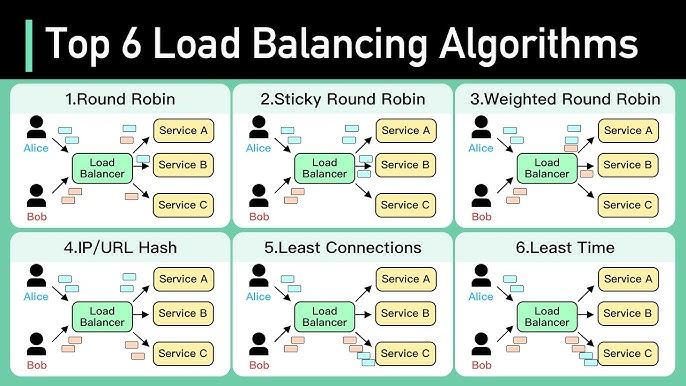

Here is the **Synchronous vs. Asynchronous** section for your booklet, followed by a clear Python code example.

***

# Section 3: Synchronous vs. Asynchronous Execution

## 1. The Core Concept
In software deployment, how your application handles multiple tasks determines its **_Throughput_** and **_Scalability_**.

*   **_Synchronous_ (Sync)**:
    *   **Behavior**: Sequential and **_Blocking_**. One task must finish completely before the next one starts.
    *   **The Problem**: If a task waits for a database or a network response (I/O), the entire CPU sits idle, doing nothing.
    *   **Analogy**: A single-lane drive-thru. You cannot take the next car's order until the current car has received their food and driven away.

*   **_Asynchronous_ (Async)**:
    *   **Behavior**: Concurrent and **_Non-Blocking_**. A task can "pause" while waiting for external events (like I/O), allowing the CPU to work on other tasks in the meantime.
    *   **The Advantage**: Highly efficient for I/O-bound applications (e.g., APIs that query databases or call other APIs).
    *   **Analogy**: A coffee shop counter. The cashier takes your order and gives you a number. While your coffee is brewing, the cashier immediately takes the next customer's order.

## 2. Why it Matters in MLOps
*   **Flask** is typically **_Synchronous_**. If one user sends a large image for processing, the worker process is blocked. Other users must wait in line.
*   **FastAPI** is **_Asynchronous_**. It uses an **_Event_Loop_** to handle thousands of concurrent connections. While one request is waiting for a database query, the server can accept new requests.

***

## 3. Python Code Example

Here is a script using Python's built-in `asyncio` library to demonstrate the difference.

**Scenario**: We need to process 3 "jobs" (e.g., database queries). Each takes 1 second.


In [7]:

import asyncio
import time

# --- 1. The Asynchronous Task ---
async def process_job_async(job_id):
    print(f"Job {job_id}: Started")
    # Simulates waiting for I/O (database, network) without blocking the CPU
    await asyncio.sleep(1)
    print(f"Job {job_id}: Finished")
    return f"Result {job_id}"

# --- 2. The Orchestrator ---
async def main():
    print("--- Starting Async Processing ---")
    start_time = time.time()

    # Create a list of 3 tasks to run concurrently
    tasks = [
        process_job_async(1),
        process_job_async(2),
        process_job_async(3)
    ]

    # Run them all at the same time and wait for results
    results = await asyncio.gather(*tasks)

    duration = time.time() - start_time
    print(f"\nTotal Time Taken: {duration:.2f} seconds")
    # Note: In a Synchronous version, this would take 3.0 seconds.
    # In Async, it takes only ~1.0 second because they overlap.

# Run the async program
if __name__ == "__main__":
    await main()         # ✅ Uses the existing Jupyter loop



--- Starting Async Processing ---
Job 1: Started
Job 2: Started
Job 3: Started
Job 1: Finished
Job 2: Finished
Job 3: Finished

Total Time Taken: 1.00 seconds


In [3]:
import time

# --- 1. The Synchronous Task ---
def process_job_sync(job_id):
    print(f"Job {job_id}: Started")
    # Simulates blocking I/O (CPU sits idle and waits)
    time.sleep(1)
    print(f"Job {job_id}: Finished")
    return f"Result {job_id}"

# --- 2. The Orchestrator ---
def main_sync():
    print("--- Starting SYNC Processing ---")
    start_time = time.time()

    # Process jobs one by one
    results = []
    for i in range(1, 4):
        res = process_job_sync(i)
        results.append(res)

    duration = time.time() - start_time
    print(f"\nTotal Time Taken: {duration:.2f} seconds")
    # Expected: ~3.0 seconds (1s + 1s + 1s)

if __name__ == "__main__":
    main_sync()


--- Starting SYNC Processing ---
Job 1: Started
Job 1: Finished
Job 2: Started
Job 2: Finished
Job 3: Started
Job 3: Finished

Total Time Taken: 3.00 seconds



### Key Python Keywords
*   **`async def`**: Defines a function that can be paused (a coroutine).
*   **`await`**: Tells Python to "pause here and go do other work" until the awaited task (like `sleep` or a DB query) is done.
*   **`asyncio.gather()`**: A utility to schedule multiple tasks to run concurrently.

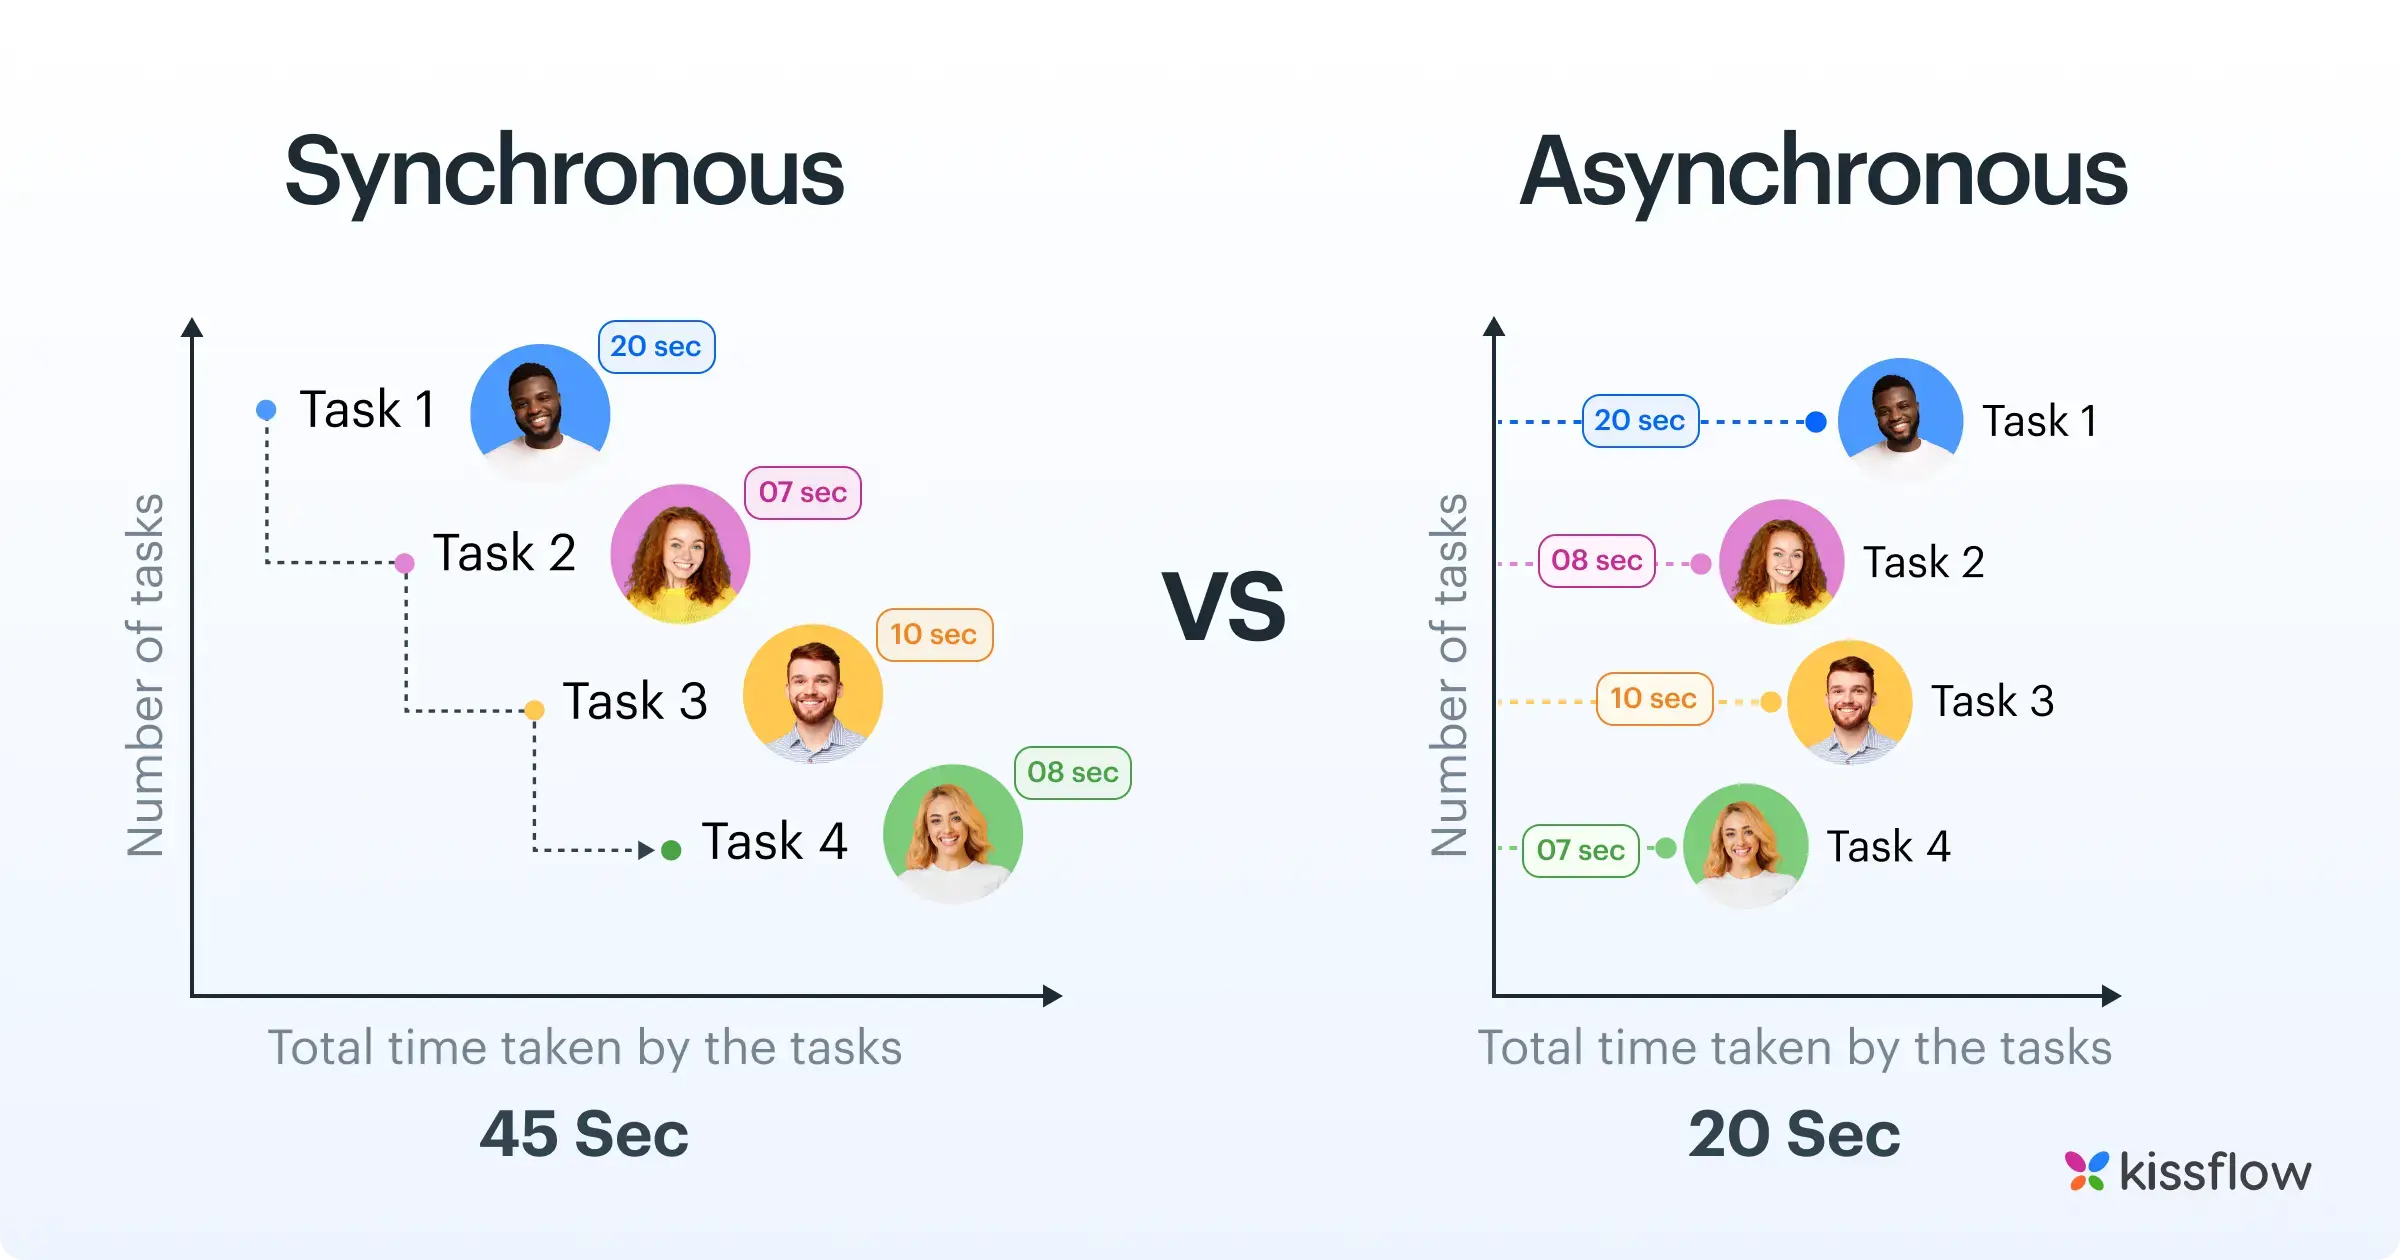

# Project Documentation: California Housing Price Predictor

## 1. Overview
This project demonstrates a complete **_Model_Deployment_** workflow. A **_Scikit-Learn_** model predicts California housing prices using **3 features**: Median Income, House Age, and Average Rooms.

The system uses **FastAPI** as the **_Client_Server_** backend with **Jinja2** templates for dynamic HTML rendering. Users interact via a web form that automatically generates **_Query_URLs_** (GET requests).

## 2. Tech Stack
- **_Framework_**: **FastAPI** (Async Python web server with automatic routing).
- **_Template_Engine_**: **Jinja2** (Dynamic HTML with `request` object support).
- **_Serialization_**: **Joblib** (Robust `.pkl` model loading with dictionary detection).
- **_Model_Backend_**: **Scikit-learn Pipeline** (Preprocessing + RandomForestRegressor).

## 3. File Structure
```text
/project_root/
├── app.py                          # FastAPI routes + model loading
├── california_housing_model.pkl     # 3-feature trained Pipeline (as dict)
├── retrain_model.py                 # Script to generate compatible model
└── templates/
    └── index.html                   # HTML form
```

## 4. Data Transmission Methods

### 4.1 Query Parameters (GET) — **Your Current Implementation**
Data is appended to the URL as `?key=value`.
- **Security**: Low (visible in URL, logged everywhere).
- **Use Case**: Simple filters, pagination.
- **HTML Form**: `<form method="get">` auto-generates query URLs.

**Example**:
```
GET /predict?med_inc=8.3&house_age=41&ave_rooms=6.9
```

### 4.2 Request Body (POST) — **Alternative Approach**
Data is sent in the HTTP body as JSON (hidden).
- **Security**: High (encrypted if using HTTPS).
- **Use Case**: Complex data, sensitive info, file uploads.
- **Requires**: Pydantic `BaseModel` for validation.

**Implementation**:
```python
from pydantic import BaseModel

class HousingInput(BaseModel):
    med_inc: float
    house_age: float
    ave_rooms: float

@app.post("/predict")  # POST instead of GET
async def predict(data: HousingInput):
    input_array = np.array([[data.med_inc, data.house_age, data.ave_rooms]])
    return {"prediction": model.predict(input_array)[0]}
```

**HTML Form Update**:
```html
<form action="/predict" method="post">  <!-- Changed to POST -->
    <input name="med_inc" required>
    <input name="house_age" required>
    <input name="ave_rooms" required>
    <button type="submit">Predict</button>
</form>
```

| Aspect | Query Params (GET) | Request Body (POST) |
|--------|-------------------|-------------------|
| **Security** | Low | High |
| **Data Location** | URL | Hidden body |
| **Bookmarkable** | ✅ Yes | ❌ No |
| **Size Limit** | ~2000 chars | No limit |
| **Complex Data** | ❌ Awkward | ✅ Clean |

## 5. Request/Response Flow

### Flow Diagram
```
Browser ──GET──> "/" ──FastAPI──> read_root(request: Request) ──Jinja2──> index.html
     ↑                                        ↓
     └────Form Submit────> "/predict?..." ──> predict() ──> model.predict()
```

### Endpoint: `GET /`
- **Purpose**: Serves the input form.
- **FastAPI Trigger**: `@app.get("/")` automatically calls `read_root()` when browser visits `/`.
- **Jinja2 Requirement**: `{"request": request}` is mandatory for template URL generation.
- **Response**: `200 OK` (HTML form).

### Endpoint: `GET /predict`
- **How It's Called**:
  1. **Direct URL**: `http://127.0.0.1:8000/predict?med_inc=8.3&house_age=41&ave_rooms=6.9`
  2. **HTML Form Submit**: `<form action="/predict" method="get">` → Browser auto-generates query URL.
- **FastAPI Trigger**: `@app.get("/predict")` matches the URL pattern and calls `predict()` automatically.
- **Parameter Mapping**:
  
  | HTML Input Name | Generated in URL | Received as Python Parameter |
  |-----------------|------------------|------------------------------|
  | `name="med_inc"` | `?med_inc=8.3` | `med_inc: float` |
  | `name="house_age"` | `&house_age=41` | `house_age: float` |
  | `name="ave_rooms"` | `&ave_rooms=6.9` | `ave_rooms: float` |

- **Logic Flow**:
  1. **Route Matching**: FastAPI router sees `/predict?...` and auto-calls `predict()`.
  2. **Parameter Extraction**: FastAPI extracts `med_inc`, `house_age`, `ave_rooms` from URL.
  3. **Global Model Access**: `model` is loaded at startup (global scope), accessible inside `predict()`.
  4. **Prediction**: Converts parameters to 2D array `[[x1, x2, x3]]` and calls `model.predict()`.
  5. **Jinja2 Rendering**: Injects result into `index.html` template and returns full HTML.

## 6. Key Concepts Explained

### Variable Scope
```python
model = joblib.load(...)  # Global (module level)

def predict():            # Function inside the module
    model.predict(...)    # ✅ Works - can READ globals
```
**Rule**: Functions can read global variables without the `global` keyword. Only use `global` if you want to *change* what the global variable points to.

### `Request` vs `request`
| Term | Type | Purpose | Example |
|------|------|---------|---------|
| **`Request`** | **Class (Blueprint)** | Type hint for the parameter | `def func(req: Request):` |
| **`request`** | **Object (Actual Data)** | Real data from current user visit | `request.url`, `request.client.host` |

Jinja2 **requires** the `request` object to work properly (for URL generation, CSRF tokens, etc.).

### Async Functions (`async def`)
- **Purpose**: Enable concurrency—the function can "pause" while waiting for I/O (database, network) and allow other requests to be processed simultaneously.
- **Your Case**: Safe to use. HTML form handling is I/O-bound (waiting for DB, network responses).
- **Rule**: Only use `async def` if your code includes `await` statements (like `await db.query()`). Otherwise, use regular `def`.

## 7. Deployment Instructions

### Step 1: Generate Compatible Model
```bash
python retrain_model.py
```
This creates a 3-feature model saved as a dictionary (`{"model": pipeline}`).

### Step 2: Install Dependencies
```bash
pip install fastapi uvicorn joblib scikit-learn jinja2 numpy
```

### Step 3: Run Server
**Option A (Terminal):**
```bash
uvicorn app:app --reload
```
**Option B (VS Code "Run" Button):**
Ensure `app.py` has:
```python
if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)
```

### Step 4: Test
- **Home Page**: `http://127.0.0.1:8000`
- **Direct Prediction**: `http://127.0.0.1:8000/predict?med_inc=8.3&house_age=41&ave_rooms=6.9`
- **Auto-Generated Docs**: `http://127.0.0.1:8000/docs`

## 📝 Summary Table

| Component | How It Works | Trigger | Output |
|-----------|-------------|---------|--------|
| **Home Page** | `@app.get("/")` decorator | Browser visits `/` | HTML form (index.html) |
| **Query→URL** | HTML form + browser native behavior | User clicks "Submit" | `?med_inc=...&house_age=...` |
| **URL→Function** | FastAPI router pattern matching | FastAPI sees `/predict?...` | Calls `predict()` function |
| **Function→Model** | Global variable access + numpy | `predict()` executes | `model.predict()` output |
| **Prediction→HTML** | Jinja2 template injection | `TemplateResponse(context=...)` | Full HTML with result |

***

## Next Modules
- **Module 2: Docker** — Containerize the API for reproducibility.
- **Module 3: Cloud & APIs** — Deploy to a cloud provider.
- **Module 4: CI/CD** — Automate testing and deployment.
- **Module 5: Monitoring** — Detect drift and retrain automatically.